In [8]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import depletion_analysis
from scipy.optimize import curve_fit
import scienceplots
import PNAS_data
import uncertainties as unc
from uncertainties import unumpy as unp
import os
import utils as uts
plt.style.use('science')

In [9]:
import sodium_crowder_equilibrium_constant as scec

data, raw_data, D_Na0 =  scec.calc_sodium_crowder_eq_constant()

KeyError: 'alpha'

In [3]:
# diffusion coefficient of the Na+ in ultra-pure water
D_Na0

1425.622636

In [4]:
# hydrodynamic radius, we have established for Na+:
uts.calculate_hydrodynamic_radius(D_Na0)

0.1721164516810126

In [5]:
# raw data from the NMR experiments: D_Na_[um2/s] column is the sodium diffusion coefficient obtained from the NMR, 
# whereas D_crowder_[um2/s] is diffusion coefficient of PEG in PEGs solution
raw_data.head()

,wt_%,D_Na_[um2/s],D_Na_err_[um2/s],D_crowder_[um2/s],D_crowder_err_[um2/s],crowder
0,0.0,1425.622636,30.4,NaN,Nan,Dextran6000
1,1.0,1450.000000,88.4,149.0,4.39E+00,Dextran6000
2,1.5,1330.000000,79.9,142.0,3.50E+00,Dextran6000
3,3.0,1300.000000,125.0,133.0,2.26E+00,Dextran6000
4,4.5,1220.000000,113.0,127.0,3.12E+00,Dextran6000


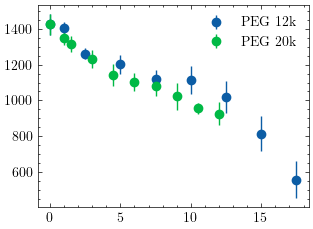

In [6]:
peg_12k = raw_data[raw_data['crowder'] == 'PEG12000']
peg_20k = raw_data[raw_data['crowder'] == 'PEG20000']


plt.errorbar(peg_12k['wt_%'] , peg_12k['D_Na_[um2/s]'], yerr=peg_12k['D_Na_err_[um2/s]'], fmt='o', label='PEG 12k')
plt.errorbar(peg_20k['wt_%'] , peg_20k['D_Na_[um2/s]'], yerr=peg_20k['D_Na_err_[um2/s]'], fmt='o', label='PEG 20k')
plt.legend()

In [7]:
# data after analysis by the code in sodium_crowder_equilibrium_constant
data.head()

,wt_%,D_Na_[um2/s],D_crowder_[um2/s],crowder,MW_[g/mol],No_mono,d_coef,Rg_[nm],Rg_err_[nm],Rh_[nm],...,V_Rg_err_[nm3],c*_[g/cm3],density,monomers concentration [M],concentration [M],mass concentration [g/cm3],ksi,D_Na_[um2/s] corr,alpha,alpha C_peg
19,1.0,(1.40+/-0.04)e+03,1130+/-9,EGly,62.07,1.0,0.00094,0.23861,0.024435,0.153145,...,0.017483,1.811243,0.99794,0.160777,0.160777,0.009979,11.798932,1419.330006,0.474019,0.076211
20,2.5,(1.37+/-0.06)e+03,1109+/-5,EGly,62.07,1.0,0.00094,0.23861,0.024435,0.153145,...,0.017483,1.811243,0.99935,0.402509,0.402509,0.024984,5.928268,1410.379983,0.474019,0.190797
21,5.0,(1.23+/-0.08)e+03,1053+/-6,EGly,62.07,1.0,0.00094,0.23861,0.024435,0.153145,...,0.017483,1.811243,1.00170,0.806912,0.806912,0.050085,3.518765,1395.901917,0.474019,0.382492
22,7.5,(1.21+/-0.06)e+03,1034+/-6,EGly,62.07,1.0,0.00094,0.23861,0.024435,0.153145,...,0.017483,1.811243,1.00405,1.213207,1.213207,0.075304,2.591544,1381.748469,0.474019,0.575084
23,10.0,(1.19+/-0.05)e+03,936+/-9,EGly,62.07,1.0,0.00094,0.23861,0.024435,0.153145,...,0.017483,1.811243,1.00640,1.621395,1.621395,0.100640,2.084938,1367.828465,0.474019,0.768573


### For small crowders, the diffusion drop is mainly due to the viscosity effects

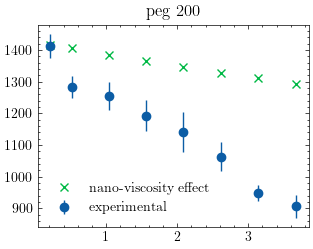

In [8]:
peg200 = data[data['crowder'] == 'PEG200']


D_measured, D_measured_err = uts.get_float_uncertainty(peg200['D_Na_[um2/s]'])

#D_viscosity, D_viscosity_err = uts.get_float_uncertainty(peg200['D_Na_[um2/s] corr'])

D_viscosity = peg200['D_Na_[um2/s] corr']


plt.errorbar( peg200['monomers concentration [M]'] , D_measured, yerr=D_measured_err, fmt='o', label='experimental')
plt.plot( peg200['monomers concentration [M]'] , D_viscosity, 'x',  label='nano-viscosity effect')
plt.title('peg 200')
plt.legend()

# For bigger crowders the errors are smaller

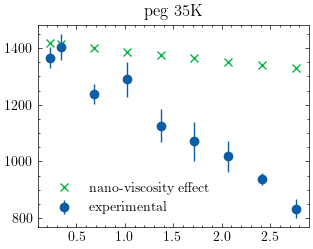

In [9]:
peg35K = data[data['crowder'] == 'PEG35000']


D_measured, D_measured_err = uts.get_float_uncertainty(peg35K['D_Na_[um2/s]'])

#D_viscosity, D_viscosity_err = uts.get_float_uncertainty(peg35K['D_Na_[um2/s] corr'])
D_viscosity = peg35K['D_Na_[um2/s] corr']

plt.errorbar( peg35K['monomers concentration [M]'] , D_measured, yerr=D_measured_err, fmt='o', label='experimental')
plt.plot( peg35K['monomers concentration [M]'] , D_viscosity, 'x' ,label='nano-viscosity effect')
plt.title('peg 35K')
plt.legend()


# Checking n(m)

In [5]:
data_for_plot = data.drop_duplicates(subset=['crowder']).sort_values(by='MW_[g/mol]')

not_pegs = ['Dextran6000', 'Dextran70000', 'Ficoll400000']

data_for_plot = data_for_plot[~data_for_plot['crowder'].isin(not_pegs)]

x = data_for_plot['No_mono']
y = data_for_plot['alpha']

a = np.dot(x, y) / np.dot(x, x)
x_int = np.linspace(min(x), max(x))

NameError: name 'data' is not defined

In [12]:
a

0.16701186547058422

In [4]:
plt.plot(x, y, '.')
plt.plot(x_int, a * x_int)

NameError: name 'x' is not defined

# Checking Ficcols Dextrans

In [48]:
import re

path = 'source_data/DNA_DNA_Ficoll_Dextran//'
directions = os.listdir(path)

In [49]:
directions

['K_resultsDEX6k-10.csv',
 'K_resultsDEX6k-12-5.csv',
 'K_resultsDEX6k-15.csv',
 'K_resultsDEX6k-2-5.csv',
 'K_resultsDEX6k-20.csv',
 'K_resultsDEX6k-25.csv',
 'K_resultsDEX6k-5.csv',
 'K_resultsDEX6k-7-5.csv',
 'K_resultsFICOLL400-10.csv',
 'K_resultsFICOLL400-12-5.csv',
 'K_resultsFICOLL400-15.csv',
 'K_resultsFICOLL400-2-5.csv',
 'K_resultsFICOLL400-5.csv',
 'K_resultsFICOLL400-7-5.csv']

In [66]:
import re

def extract_number_from_filename(filename):
    # First, try to match -X-Y (e.g. -12-5 → 12.5)
    match_range = re.search(r'-(\d+)-(\d+)', filename)
    if match_range:
        x, y = match_range.groups()
        return float(f"{x}.{y}")
    
    # If that fails, try to match a single -X (e.g. -8)
    match_single = re.search(r'-(\d+)', filename)
    if match_single:
        return float(match_single.group(1))
    
    # If nothing matches, return None or raise an error
    return None  # or: raise ValueError("No match found")


In [85]:
df_list = [] 

for file in directions:


    df = pd.read_csv(os.path.join(path + file))

    name = file.removeprefix('K_results')

    name = name.split('-')[0]
    
    numbers = re.findall(r'-(\d+)-(\d+)', name)

    combined_float = extract_number_from_filename(file)

    df['name'] = name
    df['wt%'] = combined_float

    df_list.append(df)

final_df = pd.concat(df_list)


In [86]:
final_df

,K,K_err,D,D_err,C_nM,C_err,name,wt%
0,3.332166e+09,1.167279e+09,128.0,2.40,13.312243,0.109605,DEX6k,10.0
0,7.367722e+08,2.645018e+08,113.0,1.90,15.490113,0.194071,DEX6k,12.5
0,1.648185e+09,5.169698e+08,86.0,1.60,13.754996,0.157346,DEX6k,15.0
0,2.773726e+09,7.854172e+08,134.0,3.50,11.760241,0.110176,DEX6k,2.5
0,1.239780e+09,4.024747e+08,80.0,0.61,14.559734,0.189138,DEX6k,20.0
0,3.183581e+08,6.794831e+07,42.0,0.88,19.221158,0.222506,DEX6k,25.0
0,4.265309e+09,1.287560e+09,142.0,2.70,10.673469,0.099333,DEX6k,5.0
0,3.824901e+09,1.534524e+09,145.0,2.40,11.908678,0.128725,DEX6k,7.5
0,4.185947e+09,1.588218e+09,64.0,1.70,11.634361,0.119135,FICOLL400,10.0
0,7.006086e+09,3.112793e+09,50.0,0.98,9.866966,0.116270,FICOLL400,12.5


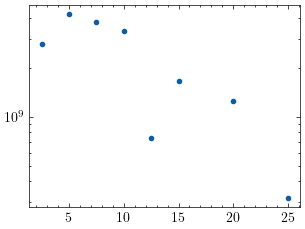

In [90]:
dex = final_df[final_df['name'] == 'DEX6k']

plt.plot(dex['wt%'], dex['K'], '.')
plt.yscale('log')

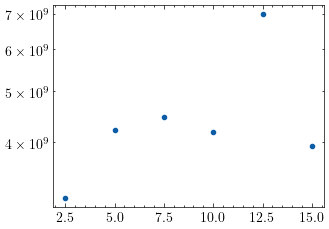

In [91]:
ficc = final_df[final_df['name'] == 'FICOLL400']

plt.plot(ficc['wt%'], ficc['K'], '.')
plt.yscale('log')

In [ ]:
plt.plot()

In [57]:
combined_float

7.5

In [54]:
numbers

[400, -7, -5]

In [43]:
df

,K,K_err,D,D_err,C_nM,C_err
0,4.467372e+09,1.565073e+09,84.0,1.1,13.321553,0.072151


# Theory and experiments

In [92]:
import K_dependency, PNAS_data

experimental_data, fitted_parameters = K_dependency.prepare_and_fit_experimental_data()
fitted_parameters = fitted_parameters.sort_values(by=['No_mono'])


In [98]:
PNAS_data.final_df

1,C (g/ml),total time (s),cNCBD (nM),η/η0,frac. bound (histo),frac. bound (rates),kon (s-1),koff (s-1),KD (nM),"kon,1 (s-1)","kon,2 (s-1)","koff,1 (s-1)","koff,2 (s-1)","KD,1 (nM)","KD,2 (nM)",probe,K [M],molar mass,c [M],monomers number
0,0.050,2356.0,17.40+/-0.10,1.05+/-0,0.42,0.420+/-0.020,4.80+/-0.20,6.50+/-0.20,23.7+/-1.3,3.20+/-0.20,1.40+/-0.10,5.30+/-0.20,22.2+/-1.6,18.5+/-0.7,101+/-10,Ethylene glycol,(4.22+/-0.23)e+07,62.07,0.805542,1.000000
1,0.100,2563.0,16.40+/-0.20,1.200+/-0.030,0.49,0.490+/-0.020,5.30+/-0.20,5.50+/-0.10,17.0+/-0.7,3.40+/-0.10,1.30+/-0.10,4.40+/-0.10,18.1+/-1.2,13.5+/-0.4,83+/-8,Ethylene glycol,(5.88+/-0.24)e+07,62.07,1.611084,1.000000
2,0.151,2467.0,16.20+/-0.20,1.30+/-0.04,0.50,0.500+/-0.020,5.10+/-0.20,5.10+/-0.10,16.2+/-0.6,3.40+/-0.30,1.20+/-0.10,4.20+/-0.10,16.6+/-1.4,13.0+/-0.6,82+/-5,Ethylene glycol,(6.17+/-0.23)e+07,62.07,2.432737,1.000000
3,0.201,3245.0,16.20+/-0.10,1.440+/-0.030,0.55,0.550+/-0.030,5.30+/-0.20,4.30+/-0.20,13.0+/-0.8,3.40+/-0.10,1.30+/-0.10,3.40+/-0.10,15.8+/-1.0,10.3+/-0.4,69+/-8,Ethylene glycol,(7.7+/-0.5)e+07,62.07,3.238279,1.000000
4,0.251,2530.0,14.50+/-0.30,1.640+/-0.010,0.53,0.530+/-0.020,4.00+/-0.10,3.60+/-0.20,13.1+/-0.6,2.60+/-0.10,0.90+/-0.10,2.90+/-0.10,12.8+/-1.5,10.5+/-0.5,71+/-6,Ethylene glycol,(7.63+/-0.35)e+07,62.07,4.043821,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0.041,4633.0,16.9+/-0.7,1.93+/-0.11,0.50,0.51+/-0.04,6.6+/-0.4,6.40+/-0.30,16.3+/-1.3,4.4+/-0.4,2.40+/-0.20,5.00+/-0.20,25.1+/-1.3,12.4+/-1.0,65+/-10,PEG 35000,(6.1+/-0.5)e+07,35000.00,0.001171,794.142565
66,0.062,2818.0,14.6+/-0,2.46+/-0.08,0.51,0.52+/-0.04,6.00+/-0.30,5.60+/-0.30,13.5+/-1.0,4.00+/-0.20,2.10+/-0.10,4.40+/-0.20,22.8+/-1.2,10.3+/-0.4,56+/-4,PEG 35000,(7.4+/-0.5)e+07,35000.00,0.001771,794.142565
67,0.082,4258.0,14.8+/-0.5,3.27+/-0.07,0.57,0.58+/-0.05,6.2+/-0.4,4.6+/-0.4,10.9+/-1.2,4.1+/-0.4,2.20+/-0.10,3.60+/-0.10,18.7+/-0.5,8.3+/-0.7,46.0+/-3.0,PEG 35000,(9.2+/-1.0)e+07,35000.00,0.002343,794.142565
68,0.102,3084.0,13.2+/-0.8,3.97+/-0.17,0.56,0.560+/-0.010,5.40+/-0.10,4.20+/-0.20,10.3+/-0.4,3.50+/-0.10,1.90+/-0.10,3.20+/-0.10,18.4+/-1.8,7.80+/-0.30,46+/-6,PEG 35000,(9.7+/-0.4)e+07,35000.00,0.002914,794.142565


In [93]:
fitted_parameters

,crowder,a2,a1,a0,MW_[g/mol],No_mono,d_coef,Rg_[nm],Rg_err_[nm],Rh_[nm],Rh_err_[nm],V_Rg_[nm3],V_Rg_err_[nm3],c*_[g/cm3]
0,EGly,-0.09+/-0.04,-0.21+/-0.26,20.8+/-0.4,62.07,1.000,0.00094,0.238610,0.024435,0.153145,0.015049,0.056905,0.017483,1.811243
1,PEG200,-1.2+/-0.6,-0.3+/-1.5,21.7+/-0.9,200.00,4.131,0.00120,0.471997,0.025338,0.298714,0.015208,0.440459,0.070935,0.754004
2,PEG400,-5.4+/-0.7,1.4+/-1.0,21.81+/-0.33,400.00,8.672,0.00130,0.707033,0.025888,0.443756,0.015303,1.480495,0.162626,0.448644
3,PEG600,-19.0+/-1.3,8.6+/-1.4,21.31+/-0.33,600.00,13.212,0.00135,0.895572,0.026216,0.559361,0.015359,3.008781,0.264224,0.331139
4,PEG1000,-36+/-11,8+/-5,22.4+/-0.4,1000.00,22.292,0.00140,1.206253,0.026634,0.748804,0.015430,7.351974,0.486996,0.225863
5,PEG1500,-100+/-13,20+/-4,21.93+/-0.29,1500.00,33.643,0.00145,1.527917,0.026971,0.943879,0.015486,14.941273,0.791237,0.166707
6,PEG3000,(-2.1+/-1.3)e+02,22+/-22,22.6+/-0.7,3000.00,67.695,0.00150,2.288759,0.027557,1.402182,0.015583,50.221429,1.814009,0.099193
7,PEG6000,(-1.1+/-0.4)e+03,54+/-34,22.5+/-0.5,6000.00,135.800,0.00155,3.428472,0.028155,2.083015,0.015681,168.807029,4.158841,0.059021
8,PEG12000,(-5.1+/-0.6)e+03,166+/-23,21.95+/-0.14,12000.00,272.009,0.00160,5.135717,0.028767,3.094429,0.015779,567.403471,9.534660,0.035119
9,PEG20000,(-9.8+/-2.2)e+03,(1.5+/-0.5)e+02,22.57+/-0.26,20000.00,453.620,0.00165,6.917337,0.029226,4.142439,0.015852,1386.453957,17.573495,0.023954


In [94]:
crowder = experimental_data['crowder'].unique()
crowder

array(['EGly', 'PEG200', 'PEG400', 'PEG600', 'PEG1000', 'PEG1500',
       'PEG3000', 'PEG6000', 'PEG12000', 'PEG20000', 'PEG35000'],
      dtype=object)

In [6]:
experimental_data.columns

Index(['name', 'crowder', 'wt_%', 'K', 'D', 'MW_[g/mol]', 'No_mono', 'd_coef',
       'Rg_[nm]', 'Rg_err_[nm]', 'Rh_[nm]', 'Rh_err_[nm]', 'V_Rg_[nm3]',
       'V_Rg_err_[nm3]', 'c*_[g/cm3]', 'density', 'concentration [M]',
       'c*_[M]', 'c/c*'],
      dtype='object')

# Comparison of ssDNA hybridization K from experiments, PNAS and from the model

In [21]:
experimental_data.columns

Index(['name', 'crowder', 'wt_%', 'K', 'D', 'MW_[g/mol]', 'No_mono', 'd_coef',
       'Rg_[nm]', 'Rg_err_[nm]', 'Rh_[nm]', 'Rh_err_[nm]', 'V_Rg_[nm3]',
       'V_Rg_err_[nm3]', 'c*_[g/cm3]', 'density', 'concentration [M]',
       'c*_[M]', 'c/c*'],
      dtype='object')

In [14]:
pnas = PNAS_data.PNAS_data()
pnas_data = pnas.data
pnas_fits = pnas.fit_coefficients

In [8]:
peg_beta_complex = final_values.loc[final_values['Crowder'] == 'PEG', 'Beta Complex'].iloc[0]

theory_data = K_dependency.calculate_a1mon_a2mon_theoretical_values(Beta_m=peg_beta_complex)

In [24]:
theory_data

,theory a1 electrostatic,theory a2m
0,0.677+/-0.034,-0.042+/-0.004


In [31]:
experimental_data

,name,crowder,wt_%,K,D,MW_[g/mol],No_mono,d_coef,Rg_[nm],Rg_err_[nm],...,Rh_err_[nm],V_Rg_[nm3],V_Rg_err_[nm3],c*_[g/cm3],density,concentration [M],c*_[M],c/c*,V_excl [nm3],G_depl [J/mol]
0,EGly_02p50,EGly,2.5,(1.81+/-0.24)e+09,140.0+/-2.1,62.07,1.000,0.00094,0.238610,0.024435,...,0.015049,0.056905,0.017483,1.811243,0.99935,0.402509,29.180648,0.013794,0.669607,0.403246
1,EGly_05p00,EGly,5.0,(6.9+/-0.5)e+08,141.0+/-2.1,62.07,1.000,0.00094,0.238610,0.024435,...,0.015049,0.056905,0.017483,1.811243,1.00170,0.806912,29.180648,0.027652,0.669607,0.403246
2,EGly_07p50,EGly,7.5,(1.88+/-0.17)e+09,125.0+/-1.1,62.07,1.000,0.00094,0.238610,0.024435,...,0.015049,0.056905,0.017483,1.811243,1.00405,1.213207,29.180648,0.041576,0.669607,0.403246
3,EGly_10p00,EGly,10.0,(5.03+/-0.26)e+08,125.0+/-1.7,62.07,1.000,0.00094,0.238610,0.024435,...,0.015049,0.056905,0.017483,1.811243,1.00640,1.621395,29.180648,0.055564,0.669607,0.403246
4,EGly_12p50,EGly,12.5,(1.30+/-0.31)e+09,107.0+/-1.4,62.07,1.000,0.00094,0.238610,0.024435,...,0.015049,0.056905,0.017483,1.811243,1.00875,2.031477,29.180648,0.069617,0.669607,0.403246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,PEG35000_15p00,PEG35000,15.0,(1.3+/-0.4)e+10,26.0+/-0.5,35000.00,794.143,0.00170,9.585839,0.029738,...,0.015932,3689.597562,34.337976,0.015752,1.02250,0.004382,0.000450,9.736804,3570.598847,2150.264886
73,PEG35000_20p00,PEG35000,20.0,(1.6+/-0.6)e+10,17.00+/-0.16,35000.00,794.143,0.00170,9.585839,0.029738,...,0.015932,3689.597562,34.337976,0.015752,1.03100,0.005891,0.000450,13.090328,3570.598847,2150.264886
74,PEG35000_25p00,PEG35000,25.0,(1.05+/-0.26)e+10,9.60+/-0.19,35000.00,794.143,0.00170,9.585839,0.029738,...,0.015932,3689.597562,34.337976,0.015752,1.03950,0.007425,0.000450,16.497812,3570.598847,2150.264886
75,PEG35000_30p00,PEG35000,30.0,(1.19+/-0.28)e+10,6.50+/-0.22,35000.00,794.143,0.00170,9.585839,0.029738,...,0.015932,3689.597562,34.337976,0.015752,1.04800,0.008983,0.000450,19.959258,3570.598847,2150.264886


In [9]:
electrostatic, _ = uts.get_float_uncertainty(theory_data['theory a1 electrostatic'][0] * fitted_parameters['No_mono'])
experimental_data['V_excl [nm3]'] = K_dependency.calc_interlap_volume(experimental_data['Rg_[nm]'], uts.Rg_ssDNA, phi=1)
depletion = experimental_data['V_excl [nm3]'].unique() * 10**(-24) * uts.Na
crowders = fitted_parameters['crowder'].unique()

In [15]:
fitted_parameters

,crowder,a2,a1,a0,MW_[g/mol],No_mono,d_coef,Rg_[nm],Rg_err_[nm],Rh_[nm],Rh_err_[nm],V_Rg_[nm3],V_Rg_err_[nm3],c*_[g/cm3]
0,EGly,-0.09+/-0.04,-0.21+/-0.26,20.8+/-0.4,62.07,1.000,0.00094,0.238610,0.024435,0.153145,0.015049,0.056905,0.017483,1.811243
1,PEG200,-1.2+/-0.6,-0.3+/-1.5,21.7+/-0.9,200.00,4.131,0.00120,0.471997,0.025338,0.298714,0.015208,0.440459,0.070935,0.754004
2,PEG400,-5.4+/-0.7,1.4+/-1.0,21.81+/-0.33,400.00,8.672,0.00130,0.707033,0.025888,0.443756,0.015303,1.480495,0.162626,0.448644
3,PEG600,-19.0+/-1.3,8.6+/-1.4,21.31+/-0.33,600.00,13.212,0.00135,0.895572,0.026216,0.559361,0.015359,3.008781,0.264224,0.331139
4,PEG1000,-36+/-11,8+/-5,22.4+/-0.4,1000.00,22.292,0.00140,1.206253,0.026634,0.748804,0.015430,7.351974,0.486996,0.225863
5,PEG1500,-100+/-13,20+/-4,21.93+/-0.29,1500.00,33.643,0.00145,1.527917,0.026971,0.943879,0.015486,14.941273,0.791237,0.166707
6,PEG3000,(-2.1+/-1.3)e+02,22+/-22,22.6+/-0.7,3000.00,67.695,0.00150,2.288759,0.027557,1.402182,0.015583,50.221429,1.814009,0.099193
7,PEG6000,(-1.1+/-0.4)e+03,54+/-34,22.5+/-0.5,6000.00,135.800,0.00155,3.428472,0.028155,2.083015,0.015681,168.807029,4.158841,0.059021
8,PEG12000,(-5.1+/-0.6)e+03,166+/-23,21.95+/-0.14,12000.00,272.009,0.00160,5.135717,0.028767,3.094429,0.015779,567.403471,9.534660,0.035119
9,PEG20000,(-9.8+/-2.2)e+03,(1.5+/-0.5)e+02,22.57+/-0.26,20000.00,453.620,0.00165,6.917337,0.029226,4.142439,0.015852,1386.453957,17.573495,0.023954


In [11]:
fitted_parameters['crowder'].unique()

array(['EGly', 'PEG200', 'PEG400', 'PEG600', 'PEG1000', 'PEG1500',
       'PEG3000', 'PEG6000', 'PEG12000', 'PEG20000', 'PEG35000'],
      dtype=object)

In [12]:
experimental_data['crowder'].unique()

array(['EGly', 'PEG200', 'PEG400', 'PEG600', 'PEG1000', 'PEG1500',
       'PEG3000', 'PEG6000', 'PEG12000', 'PEG20000', 'PEG35000'],
      dtype=object)

In [17]:
electrostatic

array([  0.67706473,   2.79695441,   5.87150536,   8.94537924,
        15.09312701,  22.77848879,  45.83389705,  91.94539064,
       184.16770075, 307.13010384, 537.68621766])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


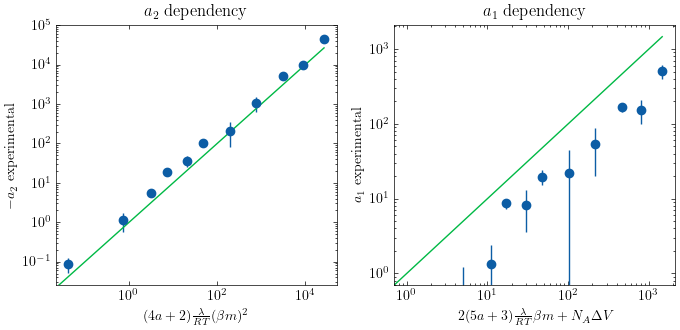

In [10]:
with plt.style.context(['science']):
    fig, axs = plt.subplots(1, 2, figsize=(7, 3.5))

    a2, a2_error = uts.get_float_uncertainty(fitted_parameters['a2'])
    a2 *= -1
    a2_x = -1 * theory_data['theory a2m'][0] * fitted_parameters['No_mono']**2
    a2_x_value, _ = uts.get_float_uncertainty(a2_x)
    
    axs[0].errorbar(a2_x_value, a2, yerr=a2_error, fmt='o')
    axs[0].plot(np.arange(a2_x_value[-1]), np.arange(a2_x_value[-1]))
    axs[0].set_yscale('log')
    axs[0].set_xscale('log')
    axs[0].set_ylabel(r'$-a_2$ experimental')
    axs[0].set_xlabel(r'$(4a + 2) \frac{\lambda}{RT} (\beta m)^2$')
    axs[0].set_title(r'$a_2$ dependency')

    
    a1, a1_error = uts.get_float_uncertainty(fitted_parameters['a1'])
    a1_x = depletion + electrostatic
    
    axs[1].errorbar(a1_x, a1, yerr=a1_error, fmt='o')
    axs[1].plot(np.arange(a1_x[-1]), np.arange(a1_x[-1]))
    axs[1].plot()
    axs[1].set_yscale('log')
    axs[1].set_xscale('log')
    axs[1].set_ylabel(r'$a_1$ experimental')
    axs[1].set_xlabel(r'$2(5a + 3) \frac{\lambda}{RT} \beta m + N_A \Delta V$')
    axs[1].set_title(r'$a_1$ dependency')

    # crowders = fitted_parameters['crowder'].unique()
    # total = electrostatic + depletion
    # axs[2].bar(crowders, electrostatic/total, label='electrostatic interaction', color='skyblue')
    # axs[2].bar(crowders, depletion/total, bottom=electrostatic/total, label='depletion', color='orange')
    # axs[2].set_xticklabels(fitted_parameters['crowder'], rotation=45, ha='right')


plt.tight_layout()
plt.legend()
    #plt.savefig('a1_a2_dependency.pdf', format='pdf', bbox_inches='tight')

In [11]:
experimental_data['G_depl precise [J/mol]'] = experimental_data.apply(
    lambda row: K_dependency.calculate_depletion_gibbs_energy(
        Rg_crowder=row['Rg_[nm]'],
        phi=row['c/c*'],
        c_star=row['c*_[M]']
    ),
    axis=1  # Apply row-wise
)

In [12]:
experimental_data['G_depl [J/mol]'] = -1* experimental_data['V_excl [nm3]']* 10**(-24) * uts.T * uts.R  * uts.Na * experimental_data['concentration [M]']

In [13]:
experimental_data['G_depl [J/mol]']/ experimental_data['G_depl precise [J/mol]']

0     0.013794
1     0.027652
2     0.041576
3     0.055564
4     0.069617
        ...   
72    1.169455
73    1.265970
74    1.346592
75    1.416338
76    1.533906
Length: 106, dtype: float64

In [50]:
experimental_data['G [J/mol]'] = 

0          -0.09+/-0.04
1          -0.09+/-0.04
2          -0.09+/-0.04
3          -0.09+/-0.04
4          -0.09+/-0.04
             ...       
101    (-4.4+/-0.7)e+04
102    (-4.4+/-0.7)e+04
103    (-4.4+/-0.7)e+04
104    (-4.4+/-0.7)e+04
105    (-4.4+/-0.7)e+04
Name: a2, Length: 106, dtype: object

# Taylor Series expansion of the theoretical model

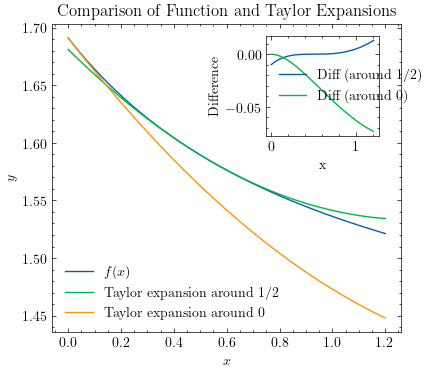

In [7]:
# Define the range for x
x = np.linspace(0, 1.2, 500)  # Ensure the domain of the function is valid

a = 0.0754 / 0.1754 * 4 + 0.0246 / 0.1754 

# Define the functions
y1 = np.sqrt(1 /(x + 1) + a)
# Taylor expansion around x = 1/2
sqrt_term = np.sqrt(2 / 3)
y2 =(4 * a + 2) / (3 * np.sqrt(3) * (3 * a + 2)**(3/2)) * x**2 - (2 * (5 * a + 3)) / (3 * np.sqrt(3) * (3 * a + 2)**(3/2)) * x + (54 * a**2 + 80 * a + 29) / (6 * np.sqrt(3) * (3 * a + 2)**(3/2))
difference = y2 - y1


# Taylor expansion around x = 0
y3 = np.sqrt(1 + a) - (1 / 2) * (1 + a)**(-1/2) * x + (3 / 8) * (1 + a)**(-3/2) * x**2

# Differences
difference1 = y2 - y1  # Difference for Taylor around 1/2
difference2 = y3 - y1  # Difference for Taylor around 0

# Plotting
with plt.style.context(['science']):
    fig, ax = plt.subplots(figsize=(4.5, 4))
    
    ax.plot(x, y1, label=r'$f(x)$')
    ax.plot(x, y2, label='Taylor expansion around 1/2')
    ax.plot(x, y3, label='Taylor expansion around 0')
    
    ax.legend(loc='lower left')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_title('Comparison of Function and Taylor Expansions')

    # Create inset manually
    inset_ax = plt.axes([0.6, 0.6, 0.25, 0.25])  # [left, bottom, width, height]
    inset_ax.plot(x, difference1, label='Diff (around 1/2)')
    inset_ax.plot(x, difference2, label='Diff (around 0)')
    inset_ax.set_xlabel('x')
    inset_ax.set_ylabel('Difference')
    inset_ax.legend()

    plt.savefig('function_taylor.pdf', format='pdf', dpi=600)

NameError: name 'coeff' is not defined

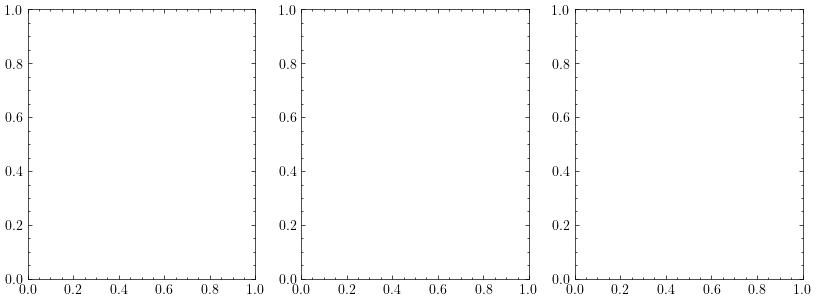

In [26]:
with plt.style.context(['science']):
    fig, axs = plt.subplots(1, 3, figsize=(10, 3.5))
    
    axs[0].plot(coeff['monomers number'], coeff['a2'], 'v')
    axs[0].set_xlabel('monomers number')
    axs[0].set_ylabel(r'$a_2$')
    axs[0].set_title(r'parameter $a_2$')
    axs[0].set_xscale('log')


    axs[1].plot(coeff['monomers number'], coeff['a1'], 'v')
    axs[1].set_xlabel('monomers number')
    axs[1].set_ylabel(r'$a_1$')
    axs[1].set_title(r'parameter $a_1$')
    axs[1].set_xscale('log')

    axs[2].plot(coeff['monomers number'], coeff['a0'], 'v')
    axs[2].set_xlabel('monomers number')
    axs[2].set_ylabel(r'$a_0$')
    axs[2].set_ylim(20,25)
    axs[2].set_title(r'parameter $a_0$')
    axs[2].set_xscale('log')


    fig.text(0.05, 0.95, 'a)', fontsize=12, fontweight='bold', ha='center', va='center')
    fig.text(0.36, 0.95, 'b)', fontsize=12, fontweight='bold', ha='center', va='center')
    fig.text(0.68, 0.95, 'c)', fontsize=12, fontweight='bold', ha='center', va='center')
    
    plt.tight_layout()

    plt.savefig('a1_a2_a0_dependency.pdf', format='pdf', bbox_inches='tight')

Estimating values from the PNAS paper

In [2]:
PNAS = PNAS_data.PNAS_data()

In [26]:
def plot_fit(probe):

    x = np.array(PNAS.get_probe(probe)['c [M]'], dtype=np.float64)
    #y, y_error = PNAS.get_float_uncertainty(unp.log(PNAS.get_probe(probe)['K [M]']))

    y, y_error = PNAS.get_float_uncertainty(1/PNAS.get_probe(probe)['K [M]'])

    

    with plt.style.context(['science']):

        plt.plot(x,y, '.')
    

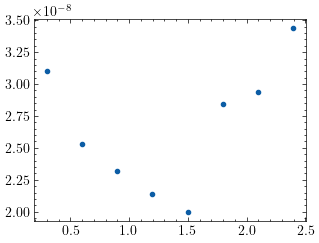

In [27]:
plot_fit('Triethylene glycol')

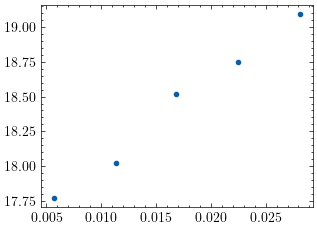

In [23]:
plot_fit('PEG 6000')

In [22]:
coeff = PNAS.coeff

In [23]:
coeff

,peg,a2,a1,a0
0,Ethylene glycol,-0.057416,0.443440,17.264778
1,Diethylene glycol,-0.117488,0.363916,17.358638
2,Triethylene glycol,-0.416552,1.061869,16.993958
3,PEG 200,-0.300799,0.886230,17.157242
4,PEG 400,-1.350031,2.197216,16.886796
5,PEG 1000,-5.402465,5.746480,17.447266
6,PEG 2050,33.233734,4.120859,17.456445
7,PEG 4600,180.611086,38.490130,17.494823
8,PEG 6000,-504.982523,77.456502,17.301372
9,PEG 35000,167454.830381,-306.272949,17.976320


In [2]:
import utils as uts
import sodium_crowder_equilibrium_constant as scec



data =  scec.calc_sodium_crowder_eq_constant()

df_ficoll = data[data['crowder'].str.contains('Ficoll', case=False)]
df_peg = data[data['crowder'].str.contains('PEG', case=False)]
df_dextran = data[data['crowder'].str.contains('Dextran', case=False)]



1425.622636


In [3]:
def choose_crowder(name):
    dat = data[data['crowder'] == name]

    return dat

In [36]:
eg = choose_crowder('PEG200')

In [37]:
eg

,wt_%,D_Na_[um2/s],D_crowder_[um2/s],crowder,MW_[g/mol],No_mono,d_coef,Rg_[nm],Rg_err_[nm],Rh_[nm],Rh_err_[nm],V_Rg_[nm3],V_Rg_err_[nm3],c*_[g/cm3],density,monomers concentration [M],mass concentration [g/cm3],ksi,D_Na_[um2/s] corr
65,1.0,(1.41+/-0.04)e+03,586.6+/-2.6,PEG200,200.0,4.131,0.0012,0.471997,0.025338,0.298714,0.015208,0.440459,0.070935,0.754004,0.9982,0.206178,0.009982,12.093611,1324.065529
66,2.5,1284+/-35,563.1+/-2.0,PEG200,200.0,4.131,0.0012,0.471997,0.025338,0.298714,0.015208,0.440459,0.070935,0.754004,1.0000,0.516375,0.025000,6.074551,1264.831713
67,5.0,(1.26+/-0.04)e+03,526.8+/-2.2,PEG200,200.0,4.131,0.0012,0.471997,0.025338,0.298714,0.015208,0.440459,0.070935,0.754004,1.0030,1.035848,0.050150,3.603844,1199.783434
68,7.5,(1.19+/-0.05)e+03,494.6+/-1.8,PEG200,200.0,4.131,0.0012,0.471997,0.025338,0.298714,0.015208,0.440459,0.070935,0.754004,1.0060,1.558420,0.075450,2.652924,1151.301446
69,10.0,(1.14+/-0.06)e+03,462.2+/-2.1,PEG200,200.0,4.131,0.0012,0.471997,0.025338,0.298714,0.015208,0.440459,0.070935,0.754004,1.0090,2.084090,0.100900,2.133294,1111.444990
70,12.5,(1.06+/-0.05)e+03,427.2+/-2.4,PEG200,200.0,4.131,0.0012,0.471997,0.025338,0.298714,0.015208,0.440459,0.070935,0.754004,1.0120,2.612858,0.126500,1.800534,1077.111637
71,15.0,948+/-24,409.2+/-2.8,PEG200,200.0,4.131,0.0012,0.471997,0.025338,0.298714,0.015208,0.440459,0.070935,0.754004,1.0150,3.144724,0.152250,1.566936,1046.702442
72,17.5,906+/-35,373.3+/-1.7,PEG200,200.0,4.131,0.0012,0.471997,0.025338,0.298714,0.015208,0.440459,0.070935,0.754004,1.0180,3.679688,0.178150,1.392771,1019.264613


In [38]:
def microviscosity(df):
    a, b = 0.7, 1.45
    return np.exp(b * (0.17 / df['ksi']) ** a)
    

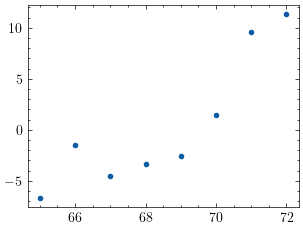

In [39]:
plt.plot((1425 - microviscosity(eg)*uts.get_float_uncertainty(eg['D_Na_[um2/s]'])[0])/1425 * 100, '.')

(array([3., 0., 0., 1., 1., 2., 0., 0., 0., 1.]),
 array([2.54370011, 2.84286076, 3.14202141, 3.44118207, 3.74034272,
        4.03950337, 4.33866402, 4.63782467, 4.93698532, 5.23614598,
        5.53530663]),
 <BarContainer object of 10 artists>)

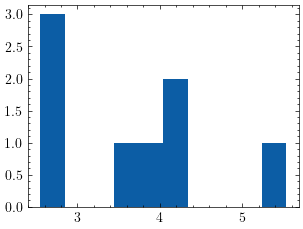

In [40]:
plt.hist(uts.get_float_uncertainty(eg['D_Na_[um2/s]'])[1]/uts.get_float_uncertainty(eg['D_Na_[um2/s]'])[0]*100)

(array([7., 0., 0., 0., 0., 0., 0., 0., 0., 7.]),
 array([0.17960138, 0.1886313 , 0.19766121, 0.20669113, 0.21572105,
        0.22475096, 0.23378088, 0.2428108 , 0.25184071, 0.26087063,
        0.26990055]),
 <BarContainer object of 10 artists>)

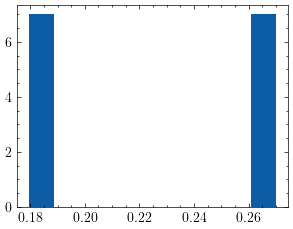

In [3]:
plt.hist(df_dextran['K complex'].apply(lambda x: x.nominal_value))

(array([7., 0., 0., 0., 0., 0., 0., 0., 0., 7.]),
 array([0.54083137, 0.5856832 , 0.63053504, 0.67538688, 0.72023872,
        0.76509056, 0.8099424 , 0.85479424, 0.89964607, 0.94449791,
        0.98934975]),
 <BarContainer object of 10 artists>)

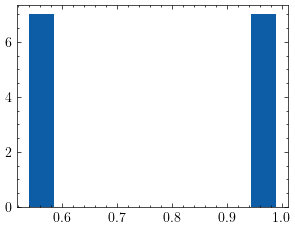

In [4]:
plt.hist(df_dextran['slope'].apply(lambda x: x.nominal_value))

(array([30.,  0.,  0.,  6.,  0.,  7.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  4.]),
 array([1.13897208, 1.41478626, 1.69060044, 1.96641462, 2.24222881,
        2.51804299, 2.79385717, 3.06967135, 3.34548553, 3.62129971,
        3.89711389, 4.17292807, 4.44874225, 4.72455643, 5.00037061,
        5.27618479, 5.55199898, 5.82781316, 6.10362734, 6.37944152,
        6.6552557 ]),
 <BarContainer object of 20 artists>)

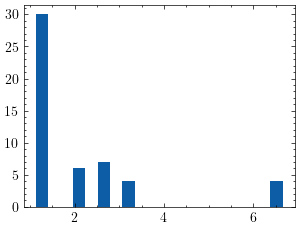

In [5]:
plt.hist(df_peg['slope'].apply(lambda x: x.nominal_value), bins=20)

(array([ 8.,  7.,  0.,  0.,  6.,  0.,  5.,  7.,  6., 12.]),
 array([3.51019292e-05, 5.62261082e-03, 1.12101197e-02, 1.67976286e-02,
        2.23851375e-02, 2.79726464e-02, 3.35601553e-02, 3.91476641e-02,
        4.47351730e-02, 5.03226819e-02, 5.59101908e-02]),
 <BarContainer object of 10 artists>)

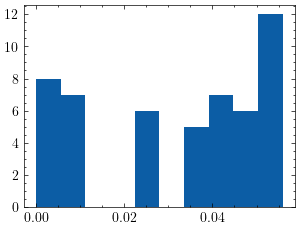

In [6]:
plt.hist(df_peg['K complex'].apply(lambda x: x.nominal_value))

(array([0., 0., 0., 0., 0., 9., 0., 0., 0., 0.]),
 array([-0.13436161, -0.03436161,  0.06563839,  0.16563839,  0.26563839,
         0.36563839,  0.46563839,  0.56563839,  0.66563839,  0.76563839,
         0.86563839]),
 <BarContainer object of 10 artists>)

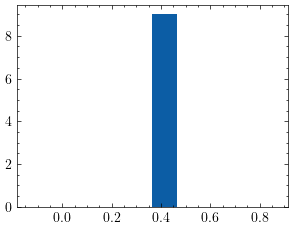

In [7]:
plt.hist(df_ficoll['K complex'].apply(lambda x: x.nominal_value))

(array([0., 0., 0., 0., 0., 9., 0., 0., 0., 0.]),
 array([0.00185126, 0.10185126, 0.20185126, 0.30185126, 0.40185126,
        0.50185126, 0.60185126, 0.70185126, 0.80185126, 0.90185126,
        1.00185126]),
 <BarContainer object of 10 artists>)

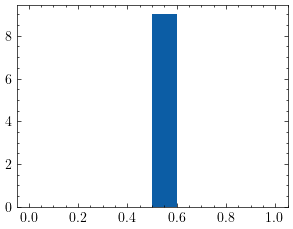

In [8]:
plt.hist(df_ficoll['slope'].apply(lambda x: x.nominal_value))

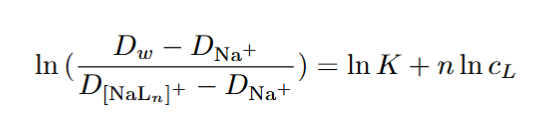

In [12]:
1/0.6

1.6666666666666667

In [31]:
merged_df

,wt_%,D_Na_[um2/s],D_Na_err_[um2/s],D_crowder_[um2/s],D_crowder_err_[um2/s],crowder,MW_[g/mol],No_mono,d_coef,Rg_[nm],Rg_err_[nm],Rh_[nm],Rh_err_[nm],V_Rg_[nm3],V_Rg_err_[nm3],c*_[g/cm3]
0,0.0,1425.622636,30.40000,NaN,Nan,Dextran6000,6000.0,37.005,0.00040,1.750000,0.250000,1.150000,0.150000,22.449298,9.621128,0.443811
1,1.0,1450.000000,88.40000,149.00000,4.39E+00,Dextran6000,6000.0,37.005,0.00040,1.750000,0.250000,1.150000,0.150000,22.449298,9.621128,0.443811
2,1.5,1330.000000,79.90000,142.00000,3.50E+00,Dextran6000,6000.0,37.005,0.00040,1.750000,0.250000,1.150000,0.150000,22.449298,9.621128,0.443811
3,3.0,1300.000000,125.00000,133.00000,2.26E+00,Dextran6000,6000.0,37.005,0.00040,1.750000,0.250000,1.150000,0.150000,22.449298,9.621128,0.443811
4,4.5,1220.000000,113.00000,127.00000,3.12E+00,Dextran6000,6000.0,37.005,0.00040,1.750000,0.250000,1.150000,0.150000,22.449298,9.621128,0.443811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,7.5,1012.123000,72.49846,44.26340,0.616912,PEG6000,6000.0,135.800,0.00155,3.428472,0.028155,2.083015,0.015681,168.807029,4.158841,0.059021
124,10.0,975.738300,121.48850,34.73010,0.192047,PEG6000,6000.0,135.800,0.00155,3.428472,0.028155,2.083015,0.015681,168.807029,4.158841,0.059021
125,12.5,898.482400,53.42060,27.38628,0.128339,PEG6000,6000.0,135.800,0.00155,3.428472,0.028155,2.083015,0.015681,168.807029,4.158841,0.059021
126,15.0,761.920200,56.79781,23.45039,0.231978,PEG6000,6000.0,135.800,0.00155,3.428472,0.028155,2.083015,0.015681,168.807029,4.158841,0.059021


In [26]:
data

,wt_%,D_Na_[um2/s],D_Na_err_[um2/s],D_crowder_[um2/s],D_crowder_err_[um2/s],crowder
0,0.0,1425.622636,30.40000,NaN,Nan,Dextran6000
1,1.0,1450.000000,88.40000,149.00000,4.39E+00,Dextran6000
2,1.5,1330.000000,79.90000,142.00000,3.50E+00,Dextran6000
3,3.0,1300.000000,125.00000,133.00000,2.26E+00,Dextran6000
4,4.5,1220.000000,113.00000,127.00000,3.12E+00,Dextran6000
...,...,...,...,...,...,...
123,7.5,1012.123000,72.49846,44.26340,0.616912,PEG6000
124,10.0,975.738300,121.48850,34.73010,0.192047,PEG6000
125,12.5,898.482400,53.42060,27.38628,0.128339,PEG6000
126,15.0,761.920200,56.79781,23.45039,0.231978,PEG6000


In [20]:
data.columns

Index(['wt_%', 'D_Na_[um2/s]', 'D_Na_err_[um2/s]', 'D_crowder_[um2/s]',
       'D_crowder_err_[um2/s]', 'crowder'],
      dtype='object')

In [24]:
Na0 = data[data['wt_%'] == 0]['D_Na_[um2/s]'].mean()

In [25]:
Na0

1425.622636

(array([ 9., 16.,  7., 12.,  4.,  1.,  0.,  5.,  6.,  2.,  0.,  3.,  8.,
         0.,  1.,  3.,  7.,  3.,  0.,  1.,  6.,  4.,  0.,  1.,  2.,  5.,
         0.,  1.,  1.,  6.]),
 array([0.02913673, 0.16369777, 0.29825881, 0.43281985, 0.56738088,
        0.70194192, 0.83650296, 0.971064  , 1.10562503, 1.24018607,
        1.37474711, 1.50930815, 1.64386919, 1.77843022, 1.91299126,
        2.0475523 , 2.18211334, 2.31667437, 2.45123541, 2.58579645,
        2.72035749, 2.85491852, 2.98947956, 3.1240406 , 3.25860164,
        3.39316268, 3.52772371, 3.66228475, 3.79684579, 3.93140683,
        4.06596786]),
 <BarContainer object of 30 artists>)

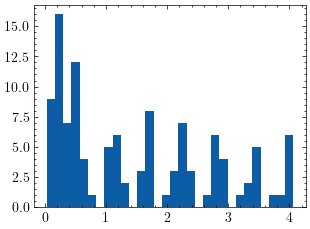

In [3]:
plt.hist(data['monomers concentration [M]'], bins=30)

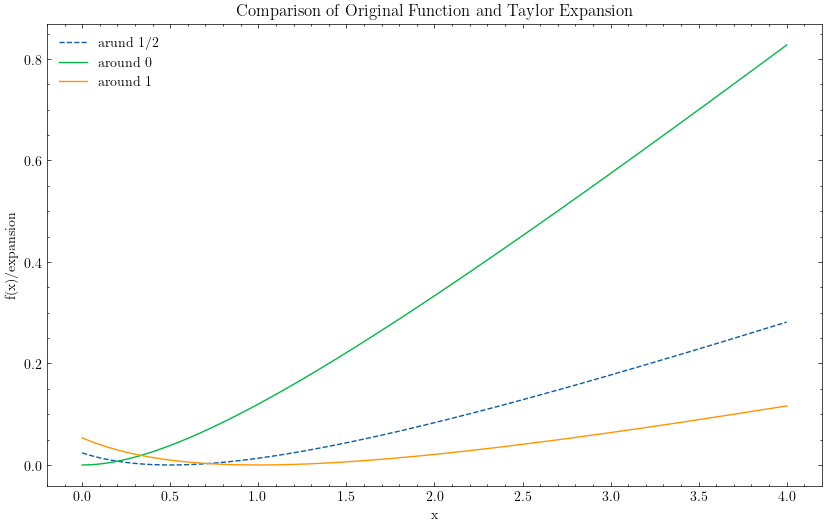

In [4]:
# Constants
A = 1400  # Example value for A
B = 1100  # Example value for B

# Original function
def original_function(x):
    return (A + B * x)/ (1 + x)



def taylor_series_half(x):
      # Centered around x = 1/2
    constant = (1/3) * (2 * A + B)
    linear = -(4/9) * (x - 0.5) * (A - B)
    # Include the first two terms; higher-order terms are denoted by O(h^2)
    return constant + linear


def taylor_series_zero(x):
        
    # Expanded around 0
    return A + (B - A) * x

def taylor_series_one(x):
    #Expanded around 1
    return 1/2 * (A + B) + 1/4 * (x - 1) * (B - A)    
    


# Generate x values for the plot
x = np.linspace(0, 4, 500)

# Evaluate functions
y_original = original_function(x)
y_taylor_half = taylor_series_half(x)
y_taylor_0 = taylor_series_zero(x)
y_taylor_one = taylor_series_one(x)

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(x, (y_original - y_taylor_half)/y_original, '--', label="arund 1/2")
plt.plot(x, (y_original - y_taylor_0)/y_original, label="around  0")
plt.plot(x, (y_original - y_taylor_one)/y_original, label="around  1")

plt.xlabel("x")
plt.ylabel("f(x)/expansion")
plt.title("Comparison of Original Function and Taylor Expansion")
plt.legend()